# Notebook to reproduce figures of bar charts for proximity bias in DepMap data when splitting by copy number data for different genes.

In [46]:
import os
import sys

import numpy as np
import pandas as pd
import scipy as sp
import pickle
import ast

import matplotlib.pyplot as plt
import seaborn as sns

# This is necesary for the svg output plots to have editable text
plt.rcParams['svg.fonttype'] = 'none'

# This isn't necessary it's just to make the notebook take up full screen real estate
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Plot data from driver scan runs

In [47]:
path = 'depmap_pb_drivers_scratch'
if not os.path.exists(path):
    os.mkdir(path)

In [48]:
tp53_res = pd.read_csv('TP53_lof_bootstrap_results.csv').rename({'Unnamed: 0': 'gene'}, axis=1)

# This is the top 100 of wt/LOF genes for 32 trials 
fixed_sampling = pd.read_csv('fixed_sampling.csv').rename({'Unnamed: 0': 'gene'}, axis=1)
# Selected genes with 128 trials
select_drivers = pd.read_csv('select_genes.csv').rename({'Unnamed: 0': 'gene'}, axis=1)
# Chr 1 genes (exploring genes near BTG2 and MDM4)
chr1_amp = pd.read_csv('chromosome_1q_amp_genes.csv').rename({'Unnamed: 0': 'gene'}, axis=1)

In [49]:
fixed_sampling.loc[:, 'search_mode'] = [x.upper().replace('GOF', 'AMP') for x in fixed_sampling.search_mode]
select_drivers.loc[:, 'search_mode'] = [x.upper().replace('GOF', 'AMP') for x in select_drivers.search_mode]
chr1_amp.loc[:, 'search_mode'] = [x.upper().replace('GOF', 'AMP') for x in chr1_amp.search_mode]

fixed_sampling.loc[:, 'tp53'] = ['TP53_'+x.upper().replace('GOF', 'AMP') for x in fixed_sampling.tp53]
select_drivers.loc[:, 'tp53'] = ['TP53_'+x.upper().replace('GOF', 'AMP') for x in select_drivers.tp53]
chr1_amp.loc[:, 'tp53'] = ['TP53_'+x.upper().replace('GOF', 'AMP') for x in chr1_amp.tp53]

In [50]:
tp53_res

,gene,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt
0,TP53,"[0.67953834, 0.68024842, 0.6816422799999999, 0...",0.68015,"[0.6521548199999999, 0.65250356, 0.65225562000...",0.648533,0.031617,lof,212,277,266


In [51]:
fixed_sampling.head(2)

,gene,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt,tp53,abs_diff
0,ABL1,"[0.5694408, 0.56177984, 0.55679282, 0.57989112...",0.56452,"[0.56812962, 0.56783548, 0.56290178, 0.5511351...",0.574644,-0.010123,LOF,20,42,183,TP53_LOF,0.010123
1,ACKR3,"[0.56734098, 0.55209118, 0.56739012, 0.5696920...",0.56438,"[0.57840272, 0.56844834, 0.55897674, 0.5608574...",0.575663,-0.011283,LOF,20,42,219,TP53_LOF,0.011283


In [52]:
select_drivers.head(2)

,gene,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt,abs_diff,tp53
0,BMPR1A,"[0.57142264, 0.5577332799999999, 0.54398684000...",0.557639,"[0.56544732, 0.5615017400000001, 0.56098088, 0...",0.574463,-0.016823,LOF,20,51,202,0.016823,TP53_LOF
1,BMPR1A,"[0.5546502, 0.5568912, 0.557222, 0.56358431999...",0.560872,"[0.5466451400000001, 0.56365854, 0.55102096, 0...",0.556962,0.003910,LOF,20,29,217,0.003910,TP53_WT


In [53]:
chr1_amp.head(2)

,gene,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt,abs_diff,tp53
0,ATP2B4,"[0.55139324, 0.5773743, 0.5674965000000001, 0....",0.566075,"[0.5759497, 0.5738704200000001, 0.59102576, 0....",0.576318,-0.010243,AMP,20,80,180,0.010243,TP53_LOF
1,ATP2B4,"[0.55642152, 0.5529569999999999, 0.55214234000...",0.562456,"[0.54134794, 0.55737622, 0.53919036, 0.5394371...",0.555196,0.007260,AMP,20,87,167,0.007260,TP53_WT


In [54]:
print('Number of genes')
print('fixed_sampling:', fixed_sampling.gene.nunique())
print('select_drivers:', select_drivers.gene.nunique())
print('chr1_amp:', chr1_amp.gene.nunique())

Number of genes
fixed_sampling: 590
select_drivers: 16
chr1_amp: 20


In [55]:
data_d = {'fixed_sampling': fixed_sampling, 
          'select_drivers': select_drivers,
          'chr1_amp': chr1_amp}
pd.concat([data_d[x].tp53.value_counts() for x in data_d], 
          keys=data_d.keys(), axis=1)

,fixed_sampling,select_drivers,chr1_amp
TP53_LOF,887,25,20
TP53_WT,446,15,20


In [56]:
pd.concat([data_d[x].groupby('tp53').gene.nunique() for x in data_d], 
          keys=data_d.keys(), axis=1)

,fixed_sampling,select_drivers,chr1_amp
tp53,,,
TP53_LOF,589,16,20
TP53_WT,424,15,20


In [57]:
pd.concat([data_d[x].groupby('search_mode').gene.nunique() for x in data_d], 
          keys=data_d.keys(), axis=1)

,fixed_sampling,select_drivers,chr1_amp
search_mode,,,
AMP,473,13,20.0
LOF,417,12,NaN


In [58]:
pd.concat([data_d[x].groupby(['tp53', 'search_mode']).gene.nunique() for x in data_d], 
          keys=data_d.keys(), axis=1)

fixed_sampling  select_drivers  chr1_amp
tp53     search_mode                                          
TP53_LOF AMP                     470              13      20.0
         LOF                     417              12       NaN
TP53_WT  AMP                     256               5      20.0
         LOF                     190              10       NaN

# Is there a correlation between the number of cell lines and the BM values?

Not really

In [59]:
tp53_res

,gene,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt
0,TP53,"[0.67953834, 0.68024842, 0.6816422799999999, 0...",0.68015,"[0.6521548199999999, 0.65250356, 0.65225562000...",0.648533,0.031617,lof,212,277,266


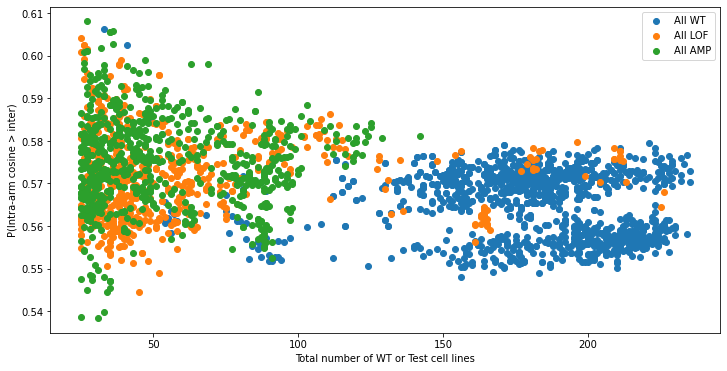

In [60]:
plt.figure(figsize=(12, 6))
plt.scatter(fixed_sampling.n_wt, fixed_sampling.wt_mean, label='All WT')
plt.scatter(fixed_sampling.query('search_mode=="LOF"').n_test, fixed_sampling.query('search_mode=="LOF"').test_mean, label='All LOF')
plt.scatter(fixed_sampling.query('search_mode=="AMP"').n_test, fixed_sampling.query('search_mode=="AMP"').test_mean, label='All AMP')

plt.xlabel('Total number of WT or Test cell lines')
plt.ylabel('P(Intra-arm cosine > inter)')
plt.legend();

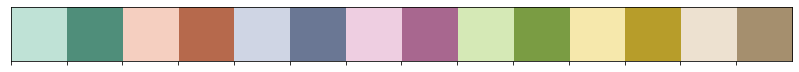

In [61]:
base_colors = sns.color_palette("Set2", 7)

# Create light and dark variants
light_colors = [sns.light_palette(color, n_colors=4, input="rgb")[1] for color in base_colors]
dark_colors = [sns.dark_palette(color, n_colors=4, input="rgb", reverse=True)[1] for color in base_colors]

# Combine into one palette
custom_palette = [item for sublist in zip(light_colors, dark_colors) for item in sublist]

# Display the palette colors
sns.palplot(custom_palette)

In [62]:
def plot_boxes(df, x, y, pal=custom_palette, xlab='', ylab='P(Intra-arm cosine > inter)', hline_y=0.5):
    ax = sns.stripplot(x=x, y=y, data=df, palette=pal, size=3,  edgecolor="black", linewidth=0.3)
    sns.boxplot(x=x, y=y, data=df,palette=pal)
    if hline_y:
        plt.hlines(hline_y, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyles='--', color='k')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    return ax

In [63]:
def add_stat_bar(ax, y, xmin, xmax, end_bar_height, stars='***', fontsize=16):
    # add horizontal line
    ax.hlines(y=y, xmin=xmin, xmax=xmax, color='k')

    # add vertical lines
    ax.vlines(x=[xmin, xmax], ymin=y-end_bar_height/2, ymax=y+end_bar_height/2, color='k')

    # add text
    txt = lambda x,y: ax.text(x=x, y=y, s=stars,
                               horizontalalignment='center',
                               fontdict={'fontsize': fontsize, 'weight': 'bold'},
                               bbox=dict(facecolor='white', edgecolor='none'))
    txt((xmin+xmax)/2, y)

In [64]:
def plot_boxes2(df, x, y, pal=custom_palette, xlab='', ylab='P(Intra-arm cosine > inter)', 
                box_width=1.0, hline_y=0.5, xlim=None):

    tmp = df.copy()
    tmp.loc[:, 'loc'] = tmp.loc[:, 'loc']*3
    tmp.loc[tmp['condition']!='WT', 'loc'] = tmp.loc[tmp['condition']!='WT', 'loc'] + 1
    
    ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black", 
                       linewidth=0.3, native_scale=True, jitter=box_width*0.4)
    sns.boxplot(x='loc', y=y, data=tmp, palette=pal, width=box_width, native_scale=True, fliersize=0)
    
    # set the x-ticks labels
    ax_nums = sorted(tmp['loc'].unique())
    x_ticks_labels = [tmp.query(f'loc=={n}')[x].unique()[0] for n in ax_nums]
    cond_labels = [x.split(' ')[1] for x in x_ticks_labels]    
    ax.set_xticks(ax_nums) 
    ax.set_xticklabels(cond_labels, fontsize=16)
    ax.set_xlabel(xlab, fontsize=20)
    ax.set_ylabel(ylab, fontsize=20)

    # Put gene names below and between WT, AMP etc.
    ax2 = ax.twiny()
    ax2.set_xbound(ax.get_xbound())
    gene_labels = [x.split(' ')[0]for x in x_ticks_labels][::2]
    new_xticks = [(x+y)/2 for x, y in zip(ax_nums[::2], ax_nums[1::2])]
    ax2.set_xticks(new_xticks)
    ax2.set_xticklabels(gene_labels, fontsize=16)
    ax2.xaxis.tick_bottom()
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 25))
    # Hiding the tick marks and the second x-axis
    ax2.tick_params(axis='x', which='both', bottom=False, top=False)
    ax2.spines['bottom'].set_visible(False)
    ax2.xaxis.set_tick_params(labelsize=16)

    if hline_y:
        plt.axhline(y = hline_y, color = 'k', linestyle = '--')

    plt.gcf().set_facecolor("white")

    return ax

In [65]:
tp53_res

,gene,test_stats,test_mean,wt_stats,wt_mean,diff,search_mode,n_sample_bootstrap,n_test,n_wt
0,TP53,"[0.67953834, 0.68024842, 0.6816422799999999, 0...",0.68015,"[0.6521548199999999, 0.65250356, 0.65225562000...",0.648533,0.031617,lof,212,277,266


Ttest_indResult(statistic=-57.2782351121411, pvalue=3.067344937153356e-147)


/tmp/ipykernel_915536/2232421099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loc', y=y, data=tmp, palette=pal, width=box_width, native_scale=True, fliersize=0)


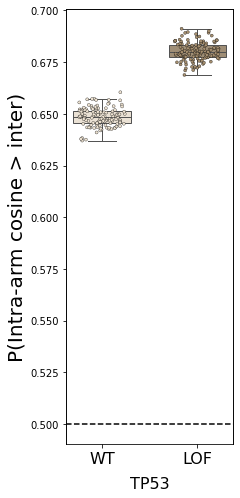

In [66]:
tmp = pd.DataFrame({'TP53 WT': np.array(ast.literal_eval(tp53_res.wt_stats[0])),
                    'TP53 LOF': np.array(ast.literal_eval(tp53_res.test_stats[0]))})
tmp = tmp.melt().assign(loc=0.5, condition='')
tmp.loc[tmp.variable=='TP53 LOF', 'loc'] = 1.5
tmp.loc[tmp.variable=='TP53 WT', 'condition'] = 'WT'
tmp.loc[tmp.variable=='TP53 LOF', 'condition'] = 'LOF'

wt = tmp.query('condition=="WT"').value.values
test = tmp.query('condition=="LOF"').value.values
print(sp.stats.ttest_ind(wt, test))

plt.figure(figsize=(3,8))
ax = plot_boxes2(x='variable', y='value', df=tmp, box_width=0.6, pal=custom_palette[12:])
plt.savefig(os.path.join(path, 'tp53_no_stars.svg'), dpi=600, format='svg', bbox_inches="tight")

In [67]:
def mk_melted(df):
    cols = ['gene', 'test_mean', 'wt_mean', 'diff', 'n_sample_bootstrap', 'n_test', 'n_wt', 'tp53', 'search_mode']
    stat_df = pd.concat([df.loc[:, cols].rename({'search_mode': 'condition'}, axis=1),
                         df.loc[:, cols[:-1]].assign(condition = 'WT')]).reset_index(drop=True)
    values = np.concatenate([np.stack(df.test_stats.apply(lambda x: np.array(ast.literal_eval(x))).values),
                             np.stack(df.wt_stats.apply(lambda x: np.array(ast.literal_eval(x))).values)])
    stat_df = pd.concat([stat_df, pd.DataFrame(values)], axis=1)
    
    cols = ['gene', 'tp53', 'condition', 'n_wt', 'n_test', 'n_sample_bootstrap']
    stat_df_melt = stat_df.loc[:, cols + list(range(values.shape[1]))].melt(id_vars=cols).drop('variable', axis=1)
    stat_df_melt = stat_df_melt.assign(
        comb_col1 = stat_df_melt[cols].apply(lambda x: ' '.join([x[0], x[2]]), axis=1),
        comb_col2 = stat_df_melt[cols].apply(lambda x: ''.join([x[0], ' TP53_', x[1], ' ', x[2]]), axis=1)
    )
    return stat_df_melt

In [68]:
fixed_sampling_melt = mk_melted(fixed_sampling)
select_drivers_melt = mk_melted(select_drivers)
chr1_amp_melt = mk_melted(chr1_amp)

TP53_WT type background


/tmp/ipykernel_915536/2232421099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:8: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loc', y=y, data=tmp, palette=pal, width=box_width, native_scale=True, fliersize=0)
/tmp/ipykernel_915536/2232421099.py:10: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.boxplot(

CDKN2A
Ttest_indResult(statistic=-9.588412980309894, pvalue=8.77880827780007e-19)
CDKN2B
Ttest_indResult(statistic=-11.135796614690305, pvalue=1.0215700442318225e-23)
CDKN2C
Ttest_indResult(statistic=nan, pvalue=nan)
BTG2
Ttest_indResult(statistic=-5.481735743170602, pvalue=1.0148644609580925e-07)
MDM2
Ttest_indResult(statistic=-9.889316306181417, pvalue=1.0169747644575644e-19)
MDM4
Ttest_indResult(statistic=-7.050512152208087, pvalue=1.6805674636852537e-11)


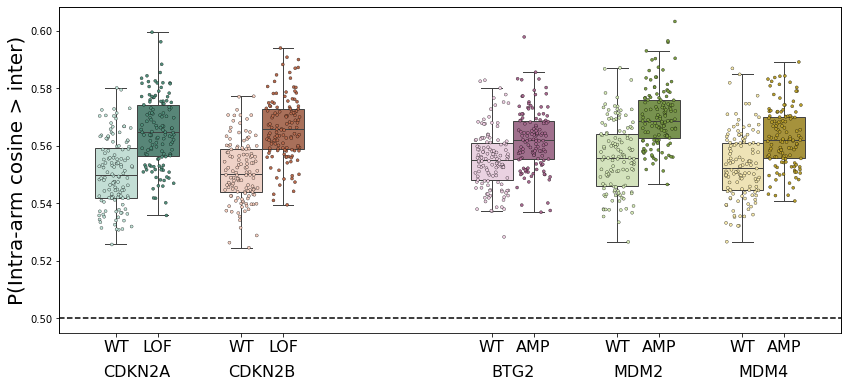

In [71]:
bg = 'TP53_WT'
print(f'{bg} type background')

genes = ['CDKN2A', 'CDKN2B', 'CDKN2C', 'BTG2', 'MDM2', 'MDM4']#, 'CDKN2C',  'PPM1D']
plt.figure(figsize=(14,6))
q = f'tp53=="{bg}" and gene in {genes} and comb_col1!="CDKN2C LOF"'
df = select_drivers_melt.query(q)
# Order genes
df = df.assign(loc=0)
for i, g in enumerate(genes):
    df.loc[df.gene==g, 'loc'] = i

ax = plot_boxes2(df=df, x='comb_col1', y='value', pal=[x for i, x in enumerate(custom_palette) if i not in (4,5)])
plt.savefig(os.path.join(path, f'select_pairs_{bg}.svg'), dpi=600, format='svg', bbox_inches="tight")

for g in genes:
    print(g)
    wt = df.query(f'gene=="{g}" and condition=="WT"').value.values
    test = df.query(f'gene=="{g}" and condition!="WT"').value.values
    print(sp.stats.ttest_ind(wt, test))

TP53 LoF background


/tmp/ipykernel_915536/2232421099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:8: UserWarning: The palette list has more values (14) than needed (12), which may not be intended.
  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loc', y=y, data=tmp, palette=pal, width=box_width, native_scale=True, fliersize=0)
/tmp/ipykernel_915536/2232421099.py:10: UserWarning: The palette list has more values (14) than needed (12), which may not be intended.
  sns.boxplot(

CDKN2A
Ttest_indResult(statistic=-15.31763709177315, pvalue=5.888185899533563e-38)
CDKN2B
Ttest_indResult(statistic=-14.029827230484601, pvalue=1.699829112246301e-33)
CDKN2C
Ttest_indResult(statistic=3.0670488800608955, pvalue=0.0022766174917863893)
BTG2
Ttest_indResult(statistic=6.891631251492775, pvalue=4.3366329907455766e-11)
MDM2
Ttest_indResult(statistic=-0.4390379030702544, pvalue=0.6610073151370186)
MDM4
Ttest_indResult(statistic=6.481417104952095, pvalue=4.694208293194436e-10)


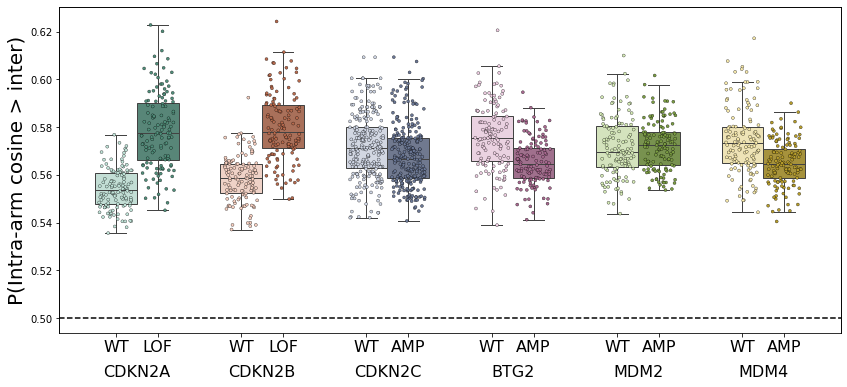

In [72]:
print('TP53 LoF background')
genes = ['CDKN2A', 'CDKN2B', 'CDKN2C', 'BTG2', 'MDM2', 'MDM4']#, 'CDKN2C',  'PPM1D']
plt.figure(figsize=(14,6))
q = f'tp53=="TP53_LOF" and gene in {genes}'
df = select_drivers_melt.query(q)
# Order genes
df = df.assign(loc=0)
for i, g in enumerate(genes):
    df.loc[df.gene==g, 'loc'] = i

ax = plot_boxes2(df=df, x='comb_col1', y='value', pal=custom_palette)
plt.savefig(os.path.join(path, 'select_pairs_tp53_lof_no_stars.svg'), dpi=600, format='svg', bbox_inches="tight")

for g in genes:
    print(g)
    wt = df.query(f'gene=="{g}" and condition=="WT"').value.values
    test = df.query(f'gene=="{g}" and condition!="WT"').value.values
    print(sp.stats.ttest_ind(wt, test))

# Chr1 genes

In [73]:
cols = ['gene', 'test_mean', 'wt_mean', 'diff', 'n_sample_bootstrap', 'n_test', 'n_wt', 'tp53', 'search_mode']
stat_df2 = pd.concat([chr1_amp.loc[:, cols].rename({'search_mode': 'condition'}, axis=1),
                      chr1_amp.loc[:, cols[:-1]].assign(condition = 'WT')]).reset_index(drop=True)
values = np.concatenate([np.stack(chr1_amp.test_stats.apply(lambda x: np.array(ast.literal_eval(x))).values),
                         np.stack(chr1_amp.wt_stats.apply(lambda x: np.array(ast.literal_eval(x))).values)])
stat_df2 = pd.concat([stat_df2, pd.DataFrame(values)], axis=1)

cols = ['gene', 'tp53', 'condition', 'n_wt', 'n_test', 'n_sample_bootstrap']
stat_df2_melt = stat_df2.loc[:, cols + list(range(values.shape[1]))].melt(id_vars=cols).drop('variable', axis=1)
stat_df2_melt = stat_df2_melt.assign(
    comb_col1 = stat_df2_melt[cols].apply(lambda x: ' '.join([x[0], x[2]]), axis=1),
    comb_col2 = stat_df2_melt[cols].apply(lambda x: ''.join([x[0], ' TP53_', x[1], ' ', x[2]]), axis=1)
)

In [77]:
# Genes between BTG2 and MDM4 ordered by position
genes_ord = ['FMOD', 'PRELP', 'OPTC', 'ATP2B4', 'LAX1', 'ZC3H11A', 'SNRPE', 
             'SOX13', 'ETNK2', 'REN', 'KISS1', 'GOLT1A', 'PLEKHA6',  'PPP1R15B', 'PIK3C2B']

TP53_WT background


/tmp/ipykernel_915536/2232421099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:8: UserWarning: 
The palette list has fewer values (14) than needed (30) and will cycle, which may produce an uninterpretable plot.
  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loc', y=y, data=tmp, palette=pal, width=box_width, native_scale=True, fliersize=0)
/tmp/ipykernel_915536/2232421099.py:10: UserWarning: 
The palette list has fewer values (14) than needed (30) and wil

FMOD
Ttest_indResult(statistic=-5.1379519193346885, pvalue=5.540236563826024e-07)
PRELP
Ttest_indResult(statistic=-6.009903388701, pvalue=6.412485248812707e-09)
OPTC
Ttest_indResult(statistic=-3.9838123873034683, pvalue=8.863604675544104e-05)
ATP2B4
Ttest_indResult(statistic=-5.4095891128765, pvalue=1.4588686677701898e-07)
LAX1
Ttest_indResult(statistic=-4.506706175642548, pvalue=1.0054506419750468e-05)
ZC3H11A
Ttest_indResult(statistic=-3.7568012436589964, pvalue=0.00021348603212500392)
SNRPE
Ttest_indResult(statistic=-5.6955867969702725, pvalue=3.391060641390132e-08)
SOX13
Ttest_indResult(statistic=-6.350649476558712, pvalue=9.825437444559714e-10)
ETNK2
Ttest_indResult(statistic=-5.38900927618187, pvalue=1.6169357334621064e-07)
REN
Ttest_indResult(statistic=-5.74959863676208, pvalue=2.558690052210452e-08)
KISS1
Ttest_indResult(statistic=-5.7356406358830325, pvalue=2.7523717930996674e-08)
GOLT1A
Ttest_indResult(statistic=-5.697365583921898, pvalue=3.359854347611893e-08)
PLEKHA6
Ttest_

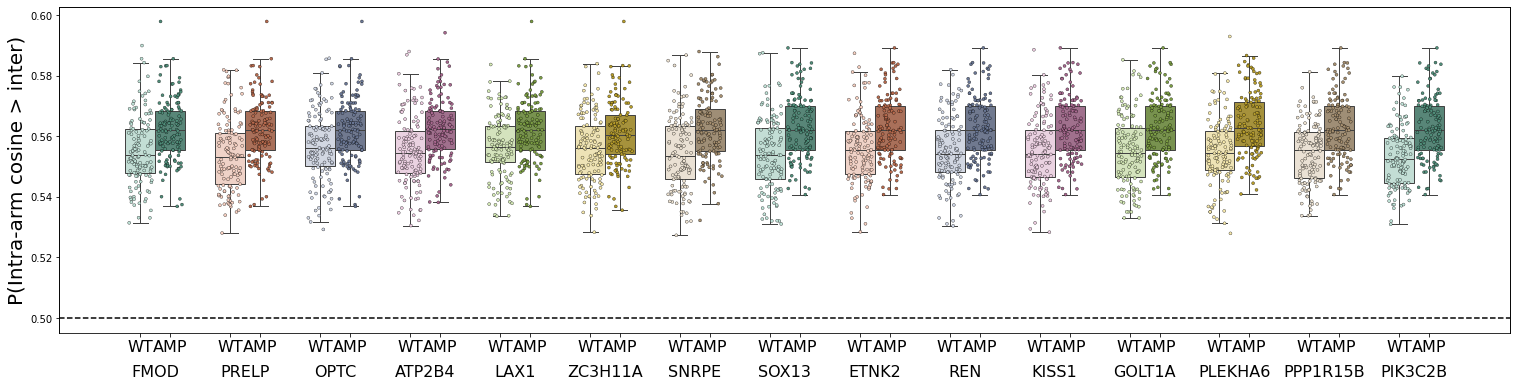

In [78]:
bg = 'TP53_WT'
print(f'{bg} background')
plt.figure(figsize=(26,6))
q = f'tp53=="{bg}" and gene in {genes_ord}'
df = chr1_amp_melt.query(q)
# Order genes
df = df.assign(loc=0)
for i, g in enumerate(genes_ord):
    df.loc[df.gene==g, 'loc'] = i

ax = plot_boxes2(df=df, x='comb_col1', y='value', pal=custom_palette)
plt.savefig(os.path.join(path, f'chr1_{bg}_no_stars.svg'), dpi=600, format='svg', bbox_inches="tight")

for g in genes_ord:
    print(g)
    wt = df.query(f'gene=="{g}" and condition=="WT"').value.values
    test = df.query(f'gene=="{g}" and condition!="WT"').value.values
    print(sp.stats.ttest_ind(wt, test))

TP53_LOF background


/tmp/ipykernel_915536/2232421099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:8: UserWarning: 
The palette list has fewer values (14) than needed (30) and will cycle, which may produce an uninterpretable plot.
  ax = sns.stripplot(x='loc', y=y, data=tmp, palette=pal, size=3, edgecolor="black",
/tmp/ipykernel_915536/2232421099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loc', y=y, data=tmp, palette=pal, width=box_width, native_scale=True, fliersize=0)
/tmp/ipykernel_915536/2232421099.py:10: UserWarning: 
The palette list has fewer values (14) than needed (30) and wil

FMOD
Ttest_indResult(statistic=5.7328820336744934, pvalue=2.7923093012292633e-08)
PRELP
Ttest_indResult(statistic=6.666666181446207, pvalue=1.6204213444187065e-10)
OPTC
Ttest_indResult(statistic=5.4193327027222375, pvalue=1.3893776023323118e-07)
ATP2B4
Ttest_indResult(statistic=7.411830892184745, pvalue=1.8505461479244583e-12)
LAX1
Ttest_indResult(statistic=6.64074238538025, pvalue=1.8827494991098592e-10)
ZC3H11A
Ttest_indResult(statistic=5.181106910021296, pvalue=4.4972292751358377e-07)
SNRPE
Ttest_indResult(statistic=7.565313704783558, pvalue=7.102580684783589e-13)
SOX13
Ttest_indResult(statistic=7.733615215620729, pvalue=2.452036695778457e-13)
ETNK2
Ttest_indResult(statistic=4.23323738241026, pvalue=3.221361132738171e-05)
REN
Ttest_indResult(statistic=6.744047024982397, pvalue=1.0330464278460471e-10)
KISS1
Ttest_indResult(statistic=6.951448482990131, pvalue=3.039904109626369e-11)
GOLT1A
Ttest_indResult(statistic=6.402807144631594, pvalue=7.327134144899434e-10)
PLEKHA6
Ttest_indResul

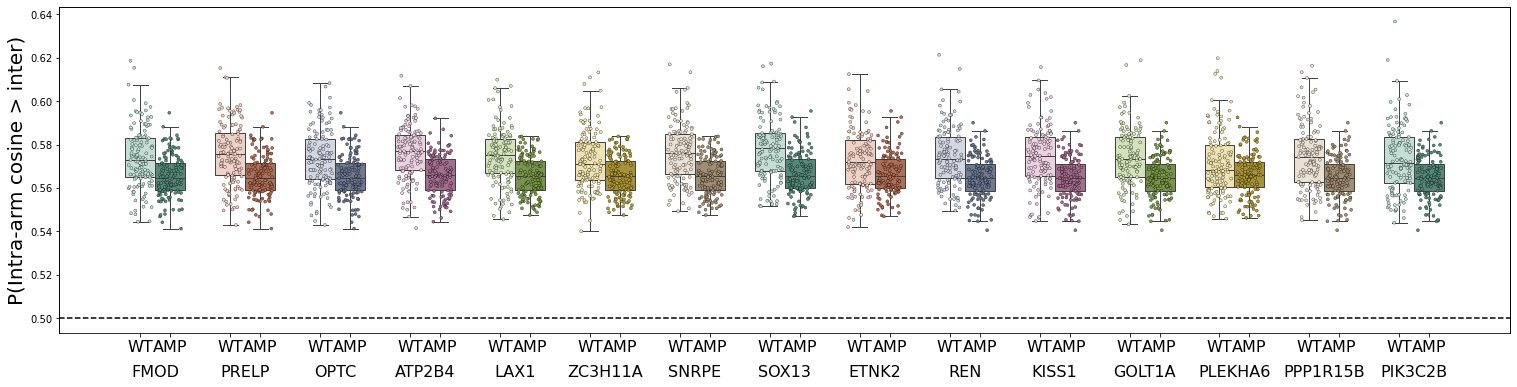

In [79]:
bg = 'TP53_LOF'
print(f'{bg} background')
plt.figure(figsize=(26,6))
q = f'tp53=="{bg}" and gene in {genes_ord}'
df = chr1_amp_melt.query(q)
# Order genes
df = df.assign(loc=0)
for i, g in enumerate(genes_ord):
    df.loc[df.gene==g, 'loc'] = i

ax = plot_boxes2(df=df, x='comb_col1', y='value', pal=custom_palette)
plt.savefig(os.path.join(path, f'chr1_{bg}_no_stars.svg'), dpi=600, format='svg', bbox_inches="tight")

for g in genes_ord:
    print(g)
    wt = df.query(f'gene=="{g}" and condition=="WT"').value.values
    test = df.query(f'gene=="{g}" and condition!="WT"').value.values
    print(sp.stats.ttest_ind(wt, test))